$good
[1] 20

$bad
[1] 20

$no
[1] 20

$good
[1] 1.958947

$bad
[1] 2.098019

$no
[1] 2.388321

$good
[1] 22.22

$bad
[1] 18.18

$no
[1] 18.725

No id variables; using all as measure variables



[1] 20.67931

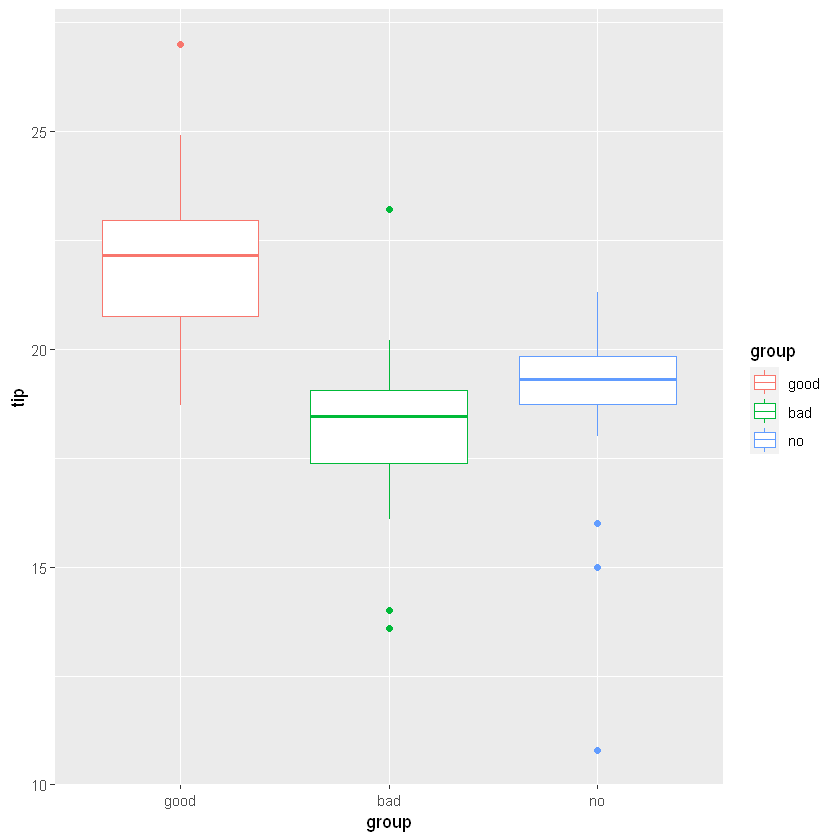

In [138]:
if (!require(pacman)) install.packages("pacman"); library(pacman)
pacman::p_load("tidyverse", "ggplot2", "reshape2")

good_report <- c(20.8, 18.7, 19.9, 20.6, 22.0, 23.4, 22.8, 24.9, 22.2, 20.3, 24.9, 22.3, 27.0, 20.4, 22.2, 24.0, 21.2, 22.1, 22.0, 22.7)
bad_report <- c(18.0, 19.0, 19.2, 18.8, 18.4, 19.0, 18.5, 16.1, 16.8, 14.0, 17.0, 13.6, 17.5, 19.9, 20.2, 18.8, 18.0, 23.2, 18.2, 19.4)
no_report <- c(19.9, 16.0, 15.0, 20.1, 19.3, 19.2, 18.0, 19.2, 21.2, 18.8, 18.5, 19.3, 19.3, 19.4, 10.8, 19.1, 19.7, 19.8, 21.3, 20.6)

reports <- data.frame(good = good_report,
                      bad = bad_report,
                      no = no_report)

reports %>%
    lapply(length)

reports %>%
    lapply(sd)

reports %>%
    lapply(mean)

reports_melted <- melt(reports, variable.name = "group", value.name = 'tip')

ggplot(data = reports_melted) +
    geom_boxplot(mapping = aes(x = group, y = tip, color = group))

n <- reports %>%
        lapply(length) %>%
        unlist()

group_mean <- reports %>%
                lapply(mean) %>%
                unlist()

all_groups_mean <- reports %>% 
                    unlist() %>%
                    mean()

group_nums <- length(reports)

SSG <- sum(n*(group_mean - all_groups_mean) ** 2)

SSE <- sum( (reports$good - mean(reports$good)) ** 2,
            (reports$bad - mean(reports$bad)) ** 2,
            (reports$no - mean(reports$no)) ** 2)

MSG <- SSG / (group_nums - 1)
MSE <- SSE / (sum(n) - group_nums)
F <- MSG / MSE
F